# Transverse field Ising model data and analysis

In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt

## Define functions for generating the plots

Run the following plot functions

- `plot_main_result`: generates the main results that show the dynamical simulations at various times up to Jt=7
- `plot_steps_used`: plots the step used for each simulation time
- `plot_abs_err`: plots the absolute Trotter errors of the step used for each simulation time
- `plot_differences`: plots the difference between the experiment data and the exact value at each simulation time



In [13]:
def plot_main_result(onjob, offjob, savefig=False):

    shots=100

    qubitnumber=32

    def exact_evolution(num_of_qubits: int, Time: float, J:float, h:float):
        N=num_of_qubits
        Jt=J*Time
        gf=h/J
        small=0.000001
        
        def epsilon(g: float, k:float):
            return 2*(g-np.cos(k))

        def gamma(k:float):
            return 2*np.sin(k)

        def En(g:float, k:float):
            return np.sqrt(epsilon(g,k)**2+gamma(k)**2)

        
        return sum(list((epsilon(gf,k)**2 + gamma(k)**2 * np.cos(2*En(gf,k)*Jt))/En(gf,k)**2 for k in np.linspace(-np.pi+(np.pi/N), np.pi-(np.pi/N), num=N)+small))/N


    def expt_val(bitstring: str):
        N=len(bitstring)
        return (bitstring.count('0')-bitstring.count('1'))/N
    

    data_on=[]
    ticks_on=[]
    for key in onjob:
        data_on.append(list(expt_val(btstr) for btstr in onjob[key]))
        ticks_on.append(float(key.replace('Y','')))
        


    data_off=[]
    ticks_off=[]
    for key in offjob:
        data_off.append(list(expt_val(btstr) for btstr in offjob[key]))
        ticks_off.append(float(key.replace('N','')))

    jobsdata_on=list(np.mean(jbdata) for jbdata in data_on)
    jobserrbars_on=list(np.std(jbdata)/np.sqrt(shots) for jbdata in data_on)

    jobsdata_off=list(np.mean(jbdata) for jbdata in data_off)
    jobserrbars_off=list(np.std(jbdata)/np.sqrt(shots) for jbdata in data_off)
    

    fig, ax = plt.subplots(1, 1)
    fig.set_facecolor('white')

    color_list = [plt.get_cmap("tab10").colors[i] for i in range(10)]


    xx=np.linspace(0,ticks_on[-1],num=200)
    ax.plot(xx,exact_evolution(num_of_qubits=qubitnumber,Time=xx, J=1,h=0.2),"-",color=color_list[0], label='exact evolution')
    ax.errorbar(ticks_on,jobsdata_on,yerr=jobserrbars_on, linestyle='-', color=color_list[1], fmt="o",markersize=5,capsize=3, ecolor=color_list[1], markerfacecolor=[1, 1, 1], markeredgecolor=color_list[1],  label='parameterized angle gate: ON')
    ax.errorbar(ticks_off,jobsdata_off,yerr=jobserrbars_off, linestyle='-',color=color_list[2], fmt="o",markersize=5,capsize=3, ecolor=color_list[2], markerfacecolor=[1, 1, 1], markeredgecolor=color_list[2],  label='parameterized angle gate: OFF')


    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(visible=True, axis="both", linestyle="--")
    ax.set_xlabel("Jt", fontsize=15)
    ax.set_ylabel(r'$\langle X\rangle$',  fontsize=15)
    ax.legend(fontsize=10,loc='upper right')

   

    if savefig:
        fig.savefig("TFIM_main_results" + ".pdf", bbox_inches="tight", format="pdf")

def plot_abs_err(saveplot=False):
    times=list(np.delete(np.linspace(0,4,30),0))+list(np.delete(np.linspace(4,7,10),0))
    abs_error=[0.000018689, 0.000270946, 0.000513466, 0.00126253, 0.00122349, 0.0015809,0.00151437, 0.00344764, 0.0000915578, 0.000884569,8.84492*10**(-7), 0.00198132, 0.00337428, 0.00404501, 0.0054424, 0.00432633, 0.00510083, 0.0044589, 0.000816297, 0.00181198, 0.00214081, 0.00100763, 0.00450167, 0.00512332, 0.00750576,0.00690575, 0.00671385, 0.00678207,0.00933749, 0.000225345, 0.00598994,0.00806655, 0.00855985, 0.0103024,0.00822109, 0.00945501, 0.00815595,0.00977049]

    xx=np.linspace(0,7,num=200)
    yy=[0.01 for ii in range(200)]
    plt.scatter(times,abs_error,marker='o')
    plt.plot(xx,yy, color='black',linewidth=4)
    plt.xlabel('Jt',fontsize='15')
    plt.ylabel(r'$\left|\langle X\rangle_r -\langle X\rangle \right|$',fontsize='15')
    plt.grid(visible=True, axis="both", linestyle="--")
    plt.ylim([-0.0001,0.012])
    plt.yticks(fontsize='12')
    plt.xticks(fontsize='12')
    if saveplot:
        plt.savefig("abs_error_plot" + ".pdf", bbox_inches="tight", format="pdf")
    plt.show()

def plot_steps_used(saveplot=False):
    times=list(np.delete(np.linspace(0,4,30),0))+list(np.delete(np.linspace(4,7,10),0))
    steps=[2, 2, 3, 3, 4, 4, 4, 2, 3, 3, 3, 4, 5, 6, 6, 7, 6, 5, 4, 5, 5, 4, 6, 8, 8, 9, 9, 8, 5, 6, 8, 10, 9, 6, 9, 10, 10, 9]
    plt.plot(times,steps,linestyle="-",marker='o', markersize=5)
    plt.xlabel('Jt',fontsize='15')
    plt.ylabel('# of steps',fontsize='15')
    plt.grid(visible=True, axis="both", linestyle="--")
    plt.yticks(fontsize='12')
    plt.xticks(fontsize='12')
    if saveplot:
        plt.savefig("steps_plot" + ".svg", bbox_inches="tight", format="svg")
    plt.show()

def plot_differences(onjob, offjob, saveplot=False):
    
    def exact_evolution(num_of_qubits: int, Time: float, J:float, h:float):
        N=num_of_qubits
        Jt=J*Time
        gf=h/J
        small=0.000001
        
        def epsilon(g: float, k:float):
            return 2*(g-np.cos(k))

        def gamma(k:float):
            return 2*np.sin(k)

        def En(g:float, k:float):
            return np.sqrt(epsilon(g,k)**2+gamma(k)**2)

        
        return sum(list((epsilon(gf,k)**2 + gamma(k)**2 * np.cos(2*En(gf,k)*Jt))/En(gf,k)**2 for k in np.linspace(-np.pi+(np.pi/N), np.pi-(np.pi/N), num=N)+small))/N


    def expt_val(bitstring: str):
        N=len(bitstring)
        return (bitstring.count('0')-bitstring.count('1'))/N
    

    qubitnumber=32
    shots=100

    ticks=list(np.delete(np.linspace(0,4,30),0))+list(np.delete(np.linspace(4,7,10),0))
    exactpoints=list(exact_evolution(num_of_qubits=qubitnumber, Time=tick, J=1, h=0.2) for tick in ticks)


    data_on=[]
    for key in onjob:
        data_on.append(list(expt_val(btstr) for btstr in onjob[key]))

    diffdataON=[]
    for ii in range(len(ticks)):
        diffdataON.append(np.abs(np.mean(data_on[ii])-exactpoints[ii]))



    data_off=[]
    for key in offjob:
        data_off.append(list(expt_val(btstr) for btstr in offjob[key]))
        
    diffdataOFF=[]
    for ii in range(len(ticks)):
        diffdataOFF.append(np.abs(np.mean(data_off[ii])-exactpoints[ii]))

    color_list = [plt.get_cmap("tab10").colors[i] for i in range(10)]
    
    jobserrbars_on=list(np.std(jbdata)/np.sqrt(shots) for jbdata in data_on)
    jobserrbars_off=list(np.std(jbdata)/np.sqrt(shots) for jbdata in data_off)
    plt.figure()
    plt.errorbar(ticks,diffdataON, yerr=jobserrbars_on,linestyle='-', color=color_list[1], fmt="o",markersize=5,capsize=3, ecolor=color_list[1], markerfacecolor=[1, 1, 1], markeredgecolor=color_list[1], label='param. angle: On')
    plt.errorbar(ticks,diffdataOFF,yerr=jobserrbars_off,linestyle='-',color=color_list[2], fmt="o",markersize=5,capsize=3, ecolor=color_list[2], markerfacecolor=[1, 1, 1], markeredgecolor=color_list[2], label='param. angle: Off')
    plt.xlabel('Jt',size='15')
    plt.ylabel(r'$|\langle X\rangle_{exact} - \langle X\rangle_{data}|$', size='15')
    plt.legend(fontsize=11)
    plt.ylim([0,0.15])
    plt.grid(visible=True, axis="both", linestyle="--")
    plt.tick_params(axis='both', which='major', labelsize=12)
    if saveplot:
        plt.savefig('data_exact.pdf',bbox_inches="tight", format="pdf")
    plt.show()

# Load experiment data

In [3]:
with open('data/arb_ON_jobs.json', 'r') as f: arb_on_jobs = json.load(f)
with open('data/arb_OFF_jobs.json', 'r') as f: arb_off_jobs = json.load(f)

Plot main results:

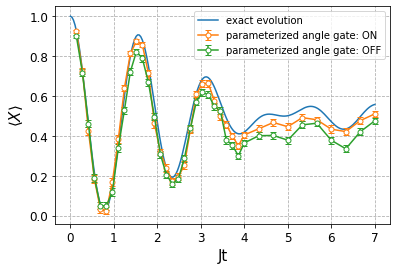

In [5]:
plot_main_result(arb_on_jobs,arb_off_jobs,savefig=False)

Plot the steps used:

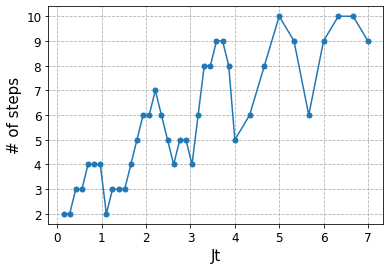

In [12]:
plot_steps_used(saveplot=False)

Plot the absolute Trotter errors using the above Trotter steps:

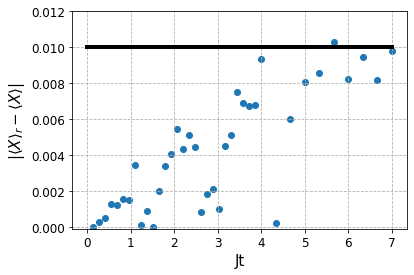

In [10]:
plot_abs_err(saveplot=False)

Plot the difference between experiment data and the exact value at each simulation time:

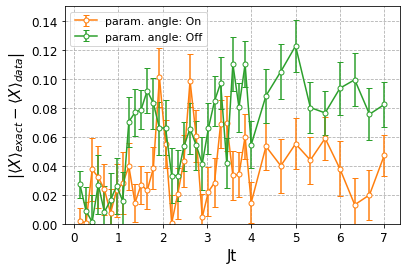

In [16]:
plot_differences(arb_on_jobs, arb_off_jobs, saveplot=False)

<div align="center"> &copy; 2023 by Quantinuum. All Rights Reserved. </div>